In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pandas import DatetimeIndex
sns.set_style("whitegrid")

In [37]:
my_columns = ["Sales_Contract_No","Account_Owner","Opportunity_Owner","Account_Type","Opportunity_Type","Quote_Type",
            "Delivery_Terms","Opportunity_Created_Date","Brand","Product_Type","Size","Product_Category_B","Price",
            "Stage","Opportunity_ID"]#contexto
df_completo = pd.read_csv('Entrenamieto_ECI_2020.csv')
df = df_completo[my_columns]


In [38]:
## Seteo de DateTime
#COLUMNA DATE A DATETIME

df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], format='%m/%d/%Y')
df["Opportunity_Created_Day"] = DatetimeIndex(df["Opportunity_Created_Date"]).day
df["Opportunity_Created_Month"] = DatetimeIndex(df["Opportunity_Created_Date"]).month
df["Opportunity_Created_Year"] = DatetimeIndex(df["Opportunity_Created_Date"]).year
df_won = df[df.Stage=="Closed Won"]
df_lost = df[df.Stage=="Closed Lost"]

df_won.head()


<ipython-input-38-ef604f3fd496>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], format='%m/%d/%Y')
<ipython-input-38-ef604f3fd496>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Opportunity_Created_Day"] = DatetimeIndex(df["Opportunity_Created_Date"]).day
<ipython-input-38-ef604f3fd496>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Stage,Opportunity_ID,Opportunity_Created_Day,Opportunity_Created_Month,Opportunity_Created_Year
1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,Closed Won,1,7,12,2015
2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,Closed Won,2,8,12,2015
7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-09,None,None,None,None,None,Closed Won,7,9,12,2015
23,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-09,None,None,None,None,None,Closed Won,11,9,12,2015
63,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,2015-12-09,None,None,None,None,None,Closed Won,20,9,12,2015


Oportunidades Gral promedio por Account_Owner = 203.97916666666666
Oportunidades Won promedio por Account_Owner = 130.05128205128204
Oportunidades Lost promedio por Account_Owner = 98.3125


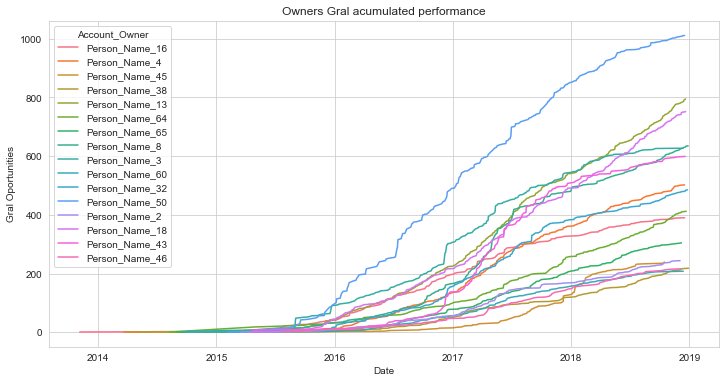

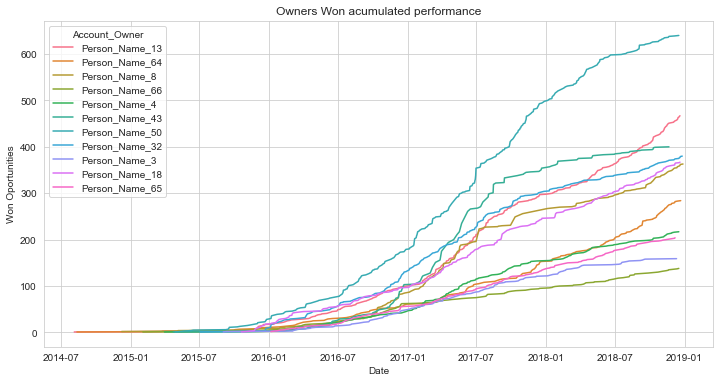

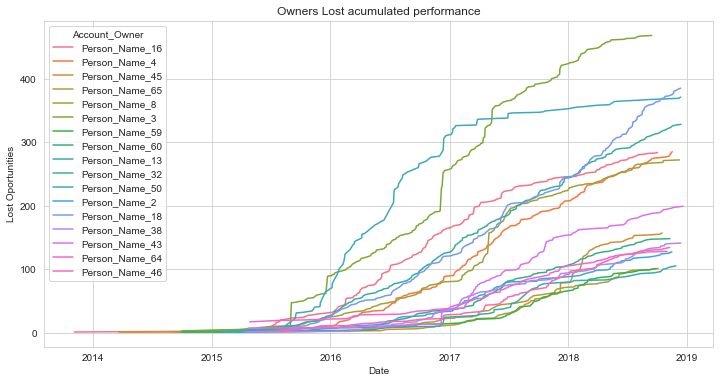

In [39]:
##EVOLUCION ACUMULADA DE OPORTUNIDADES SEGUN DUEÑOS
#(para aquellos que superen el promedio)

dfs = [df, df_won, df_lost]
dfs_desc = ["Gral","Won","Lost"]

for i in range(0,3): #lo hago en general, ganados y perdidos
    dataframe = dfs[i]
    dataframe = dataframe[(dataframe["Stage"]=="Closed Won") | (dataframe["Stage"]=="Closed Lost")].drop_duplicates(subset=['Opportunity_ID'], keep='last')
    series_owners = dataframe.groupby("Account_Owner")["Opportunity_ID"].agg("count")
    prom_per_owner = series_owners.agg("mean")
    dataframe_owners = series_owners.to_frame().reset_index() #NO PUDE HACERLO CON MERGE
    dataframe_owners.columns = ["Account_Owner", "Opportunity_Qtty"]
    print("Oportunidades "+dfs_desc[i]+" promedio por Account_Owner = "+str(prom_per_owner))

    dataframe = pd.merge(dataframe, dataframe_owners, on="Account_Owner",how="inner")
    dataframe["Opportunity_Qtty_Prom"] = prom_per_owner

    dataframe_per_account_owners = dataframe[dataframe["Opportunity_Qtty"]>dataframe["Opportunity_Qtty_Prom"]]
    graph_df = dataframe_per_account_owners.groupby(["Opportunity_Created_Date", "Account_Owner"]).agg({"Opportunity_ID":"count"})
    graph_df.columns = ["Opportunity_Qtty"]
    graph_df = graph_df.groupby(["Account_Owner"]).agg({"Opportunity_Qtty":np.cumsum}).reset_index()

    fig, ax = plt.subplots(figsize = (12,6))
    fig = sns.lineplot(data=graph_df, x='Opportunity_Created_Date', y='Opportunity_Qtty', hue='Account_Owner', ax=ax)
    fig.set_ylabel(dfs_desc[i]+" Oportunities")
    fig.set_xlabel("Date")
    fig.set_title("Owners "+dfs_desc[i]+" acumulated performance")

[]

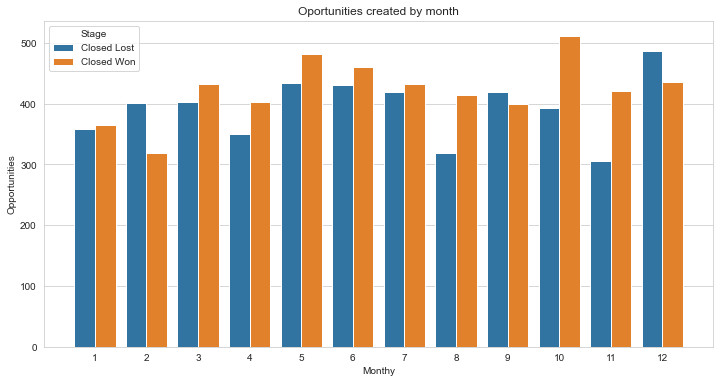

In [40]:
##OPORTUNIDADES CREADAS POR MES (según target)

moth_creation = df[(df["Stage"]=="Closed Won") | (df["Stage"]=="Closed Lost")].drop_duplicates(subset=['Opportunity_ID'], keep='last').groupby(["Opportunity_Created_Month","Stage"]).agg({"Opportunity_ID":"count"}).reset_index()
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.barplot(data=moth_creation,x="Opportunity_Created_Month", y="Opportunity_ID", hue="Stage", ax=ax)
fig.set_ylabel("Opportunities")
fig.set_xlabel("Monthy")
fig.set_title("Oportunities created by month")
fig.plot()